# Importing Necessary Libraries

In [1]:
import pandas as pd,numpy as np # For Data Manipulation
import matplotlib.pyplot as pp,seaborn as sb # For Data Visualisation 
from category_encoders import OrdinalEncoder # For Categorical Encoding
from sklearn.model_selection import train_test_split # For Model Validation sets
from sklearn.naive_bayes import GaussianNB # Model 1 : Naive Bayes - Probablistic Model
from sklearn.tree import DecisionTreeClassifier as DTC # Model 2 : Decision Tree - Determministic Model
import sklearn.tree as tree # For Decision Tree Visualisation
from sklearn.ensemble import RandomForestClassifier # Model 3 : Random Forest - Ensemble Model (Bagging)
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score #Model Validation

# Importing our data

In [2]:
data = pd.read_csv('data.csv')

# Exploring our data - Descriptive

## Getting first 5 rows

In [3]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Getting first 'n' rows

In [4]:
data.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

## Getting last 5 rows

In [5]:
data.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

## Getting last 'n' rows

In [6]:
data.tail(10)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not Graduate            No   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
604            12000                0.0       496.0             360.0   
605             2400             3800.0         NaN             180.0   
606             3400             2500.0       173.0             360.0   
607             3987             1411.0       157.0             360.0   
608             3232             1950.0       108.0             360.0   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
604             1.0     Semiurban           Y  
605             1.0         Urban           N  
606             1.0     Semiurban           Y  
607             1.0         Rural           Y  
608             1.0         Rural           Y  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

## Looking at the description

In [7]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

## Looking at its shape

In [8]:
data.shape

(614, 13)

# Data Preperation

## Checking for Null Values

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Null values

### Handling Null Values in Categorical Features

In [10]:
data['Gender'].fillna(method='ffill',inplace=True)
data['Self_Employed'].fillna(method='bfill',inplace=True)
data['Married'].fillna(method='ffill',inplace=True)

In [11]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling Null Values in Dependents by mean

In [12]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### Converting the data into numerical

In [13]:
def convert_to_str(x):
    if x == '3+':
        return float(x[:-1])
    return float(x)

In [14]:
data['Dependents']=data['Dependents'].apply(convert_to_str)

In [15]:
data['Dependents'].fillna(data['Dependents'].mean(),inplace=True)

In [16]:
data['Dependents'] = data['Dependents'].apply(float)
data['Dependents'].isnull().sum()

0

### Handling Null Values in Numerical Features

In [17]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)

In [18]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Looking for duplicates

In [19]:
data.duplicated().sum()

0

# Exploring our data - Graphical

## Histograms

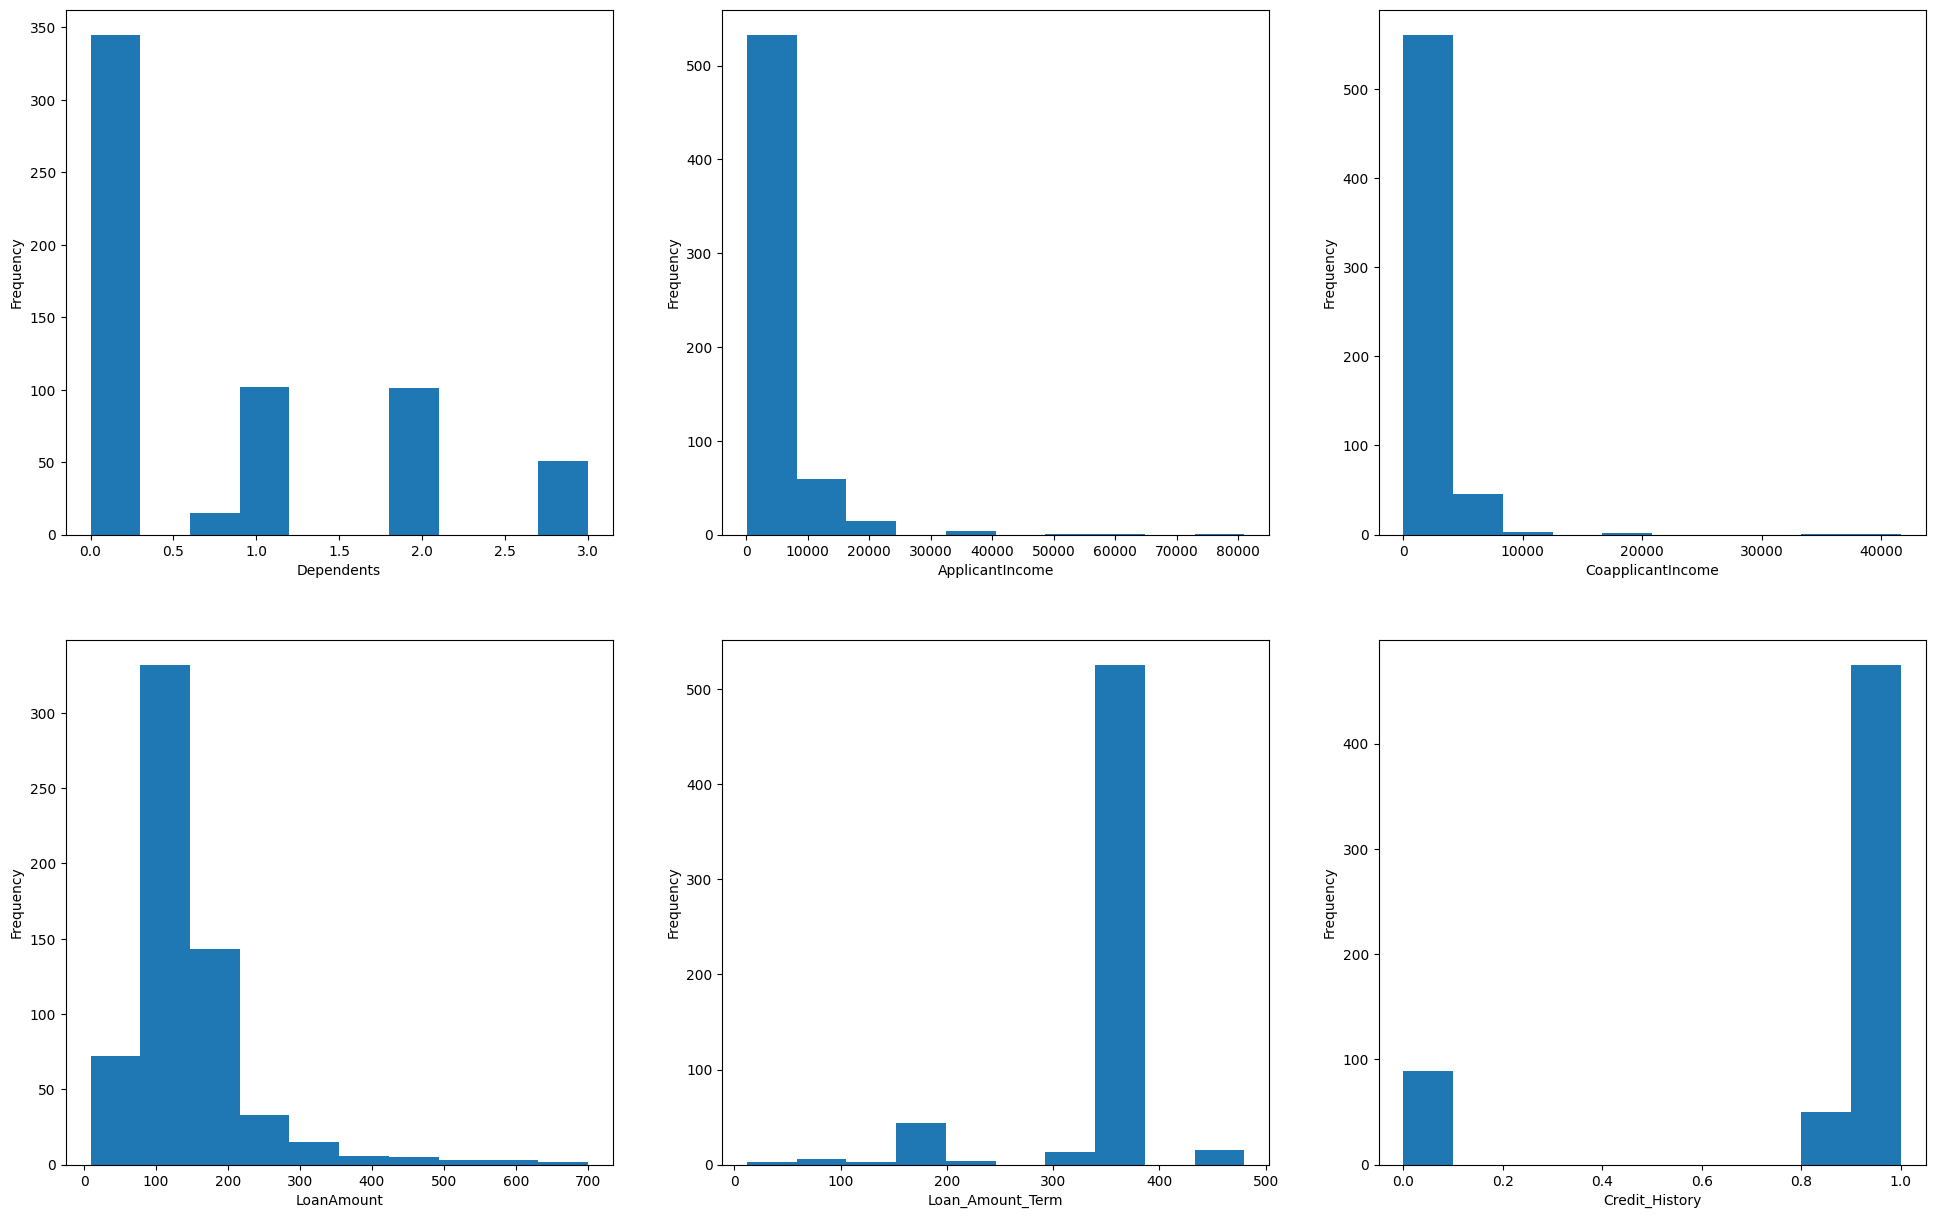

In [20]:
numeric_vars =  ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
# create histograms for each numeric variable
fig = pp.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(2, 3, i + 1)
    sub.set_xlabel(var)
    data[var].plot(kind = 'hist')

## Kde Plot

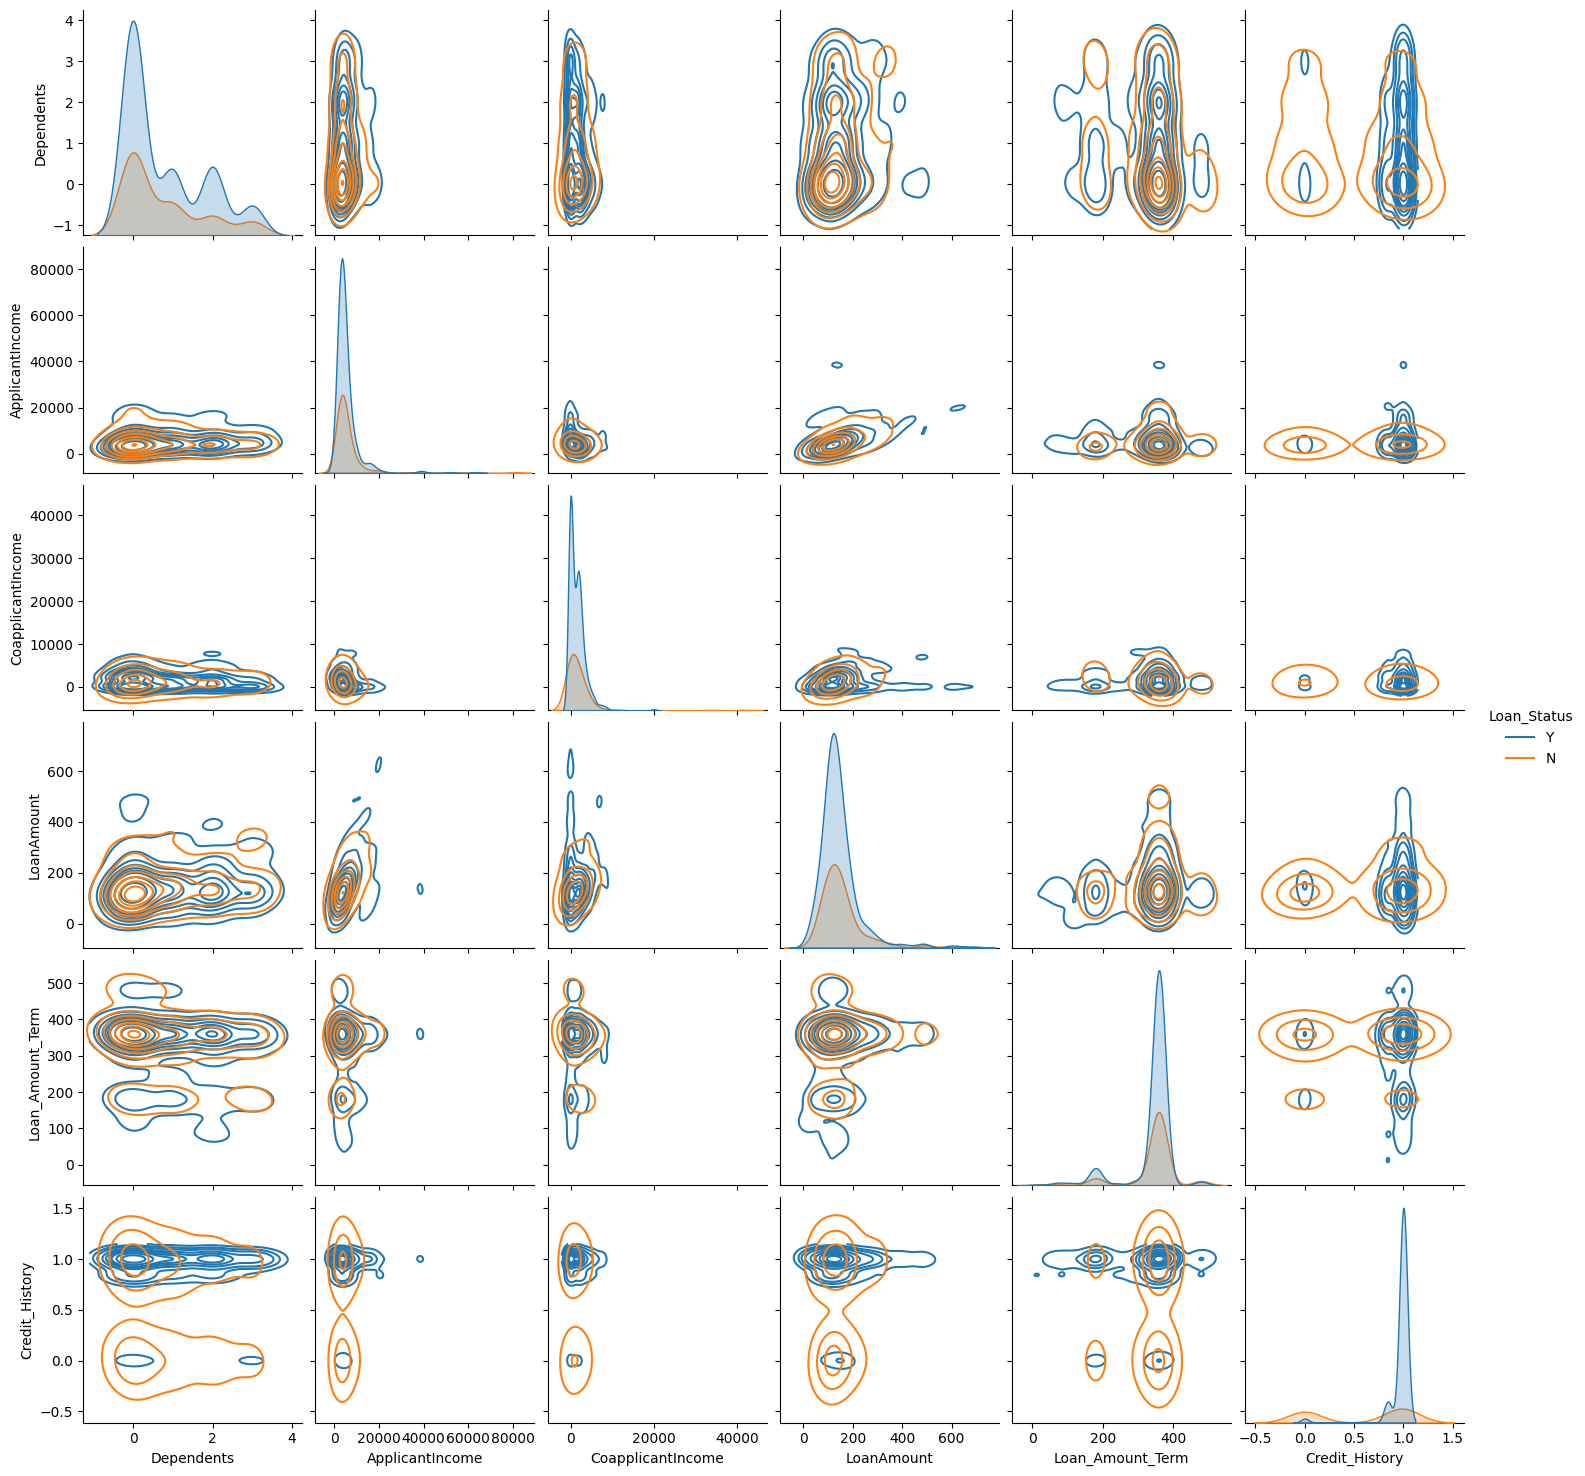

In [21]:
sb.pairplot(data,hue='Loan_Status',kind='kde')
pp.show()

## Pair Plot

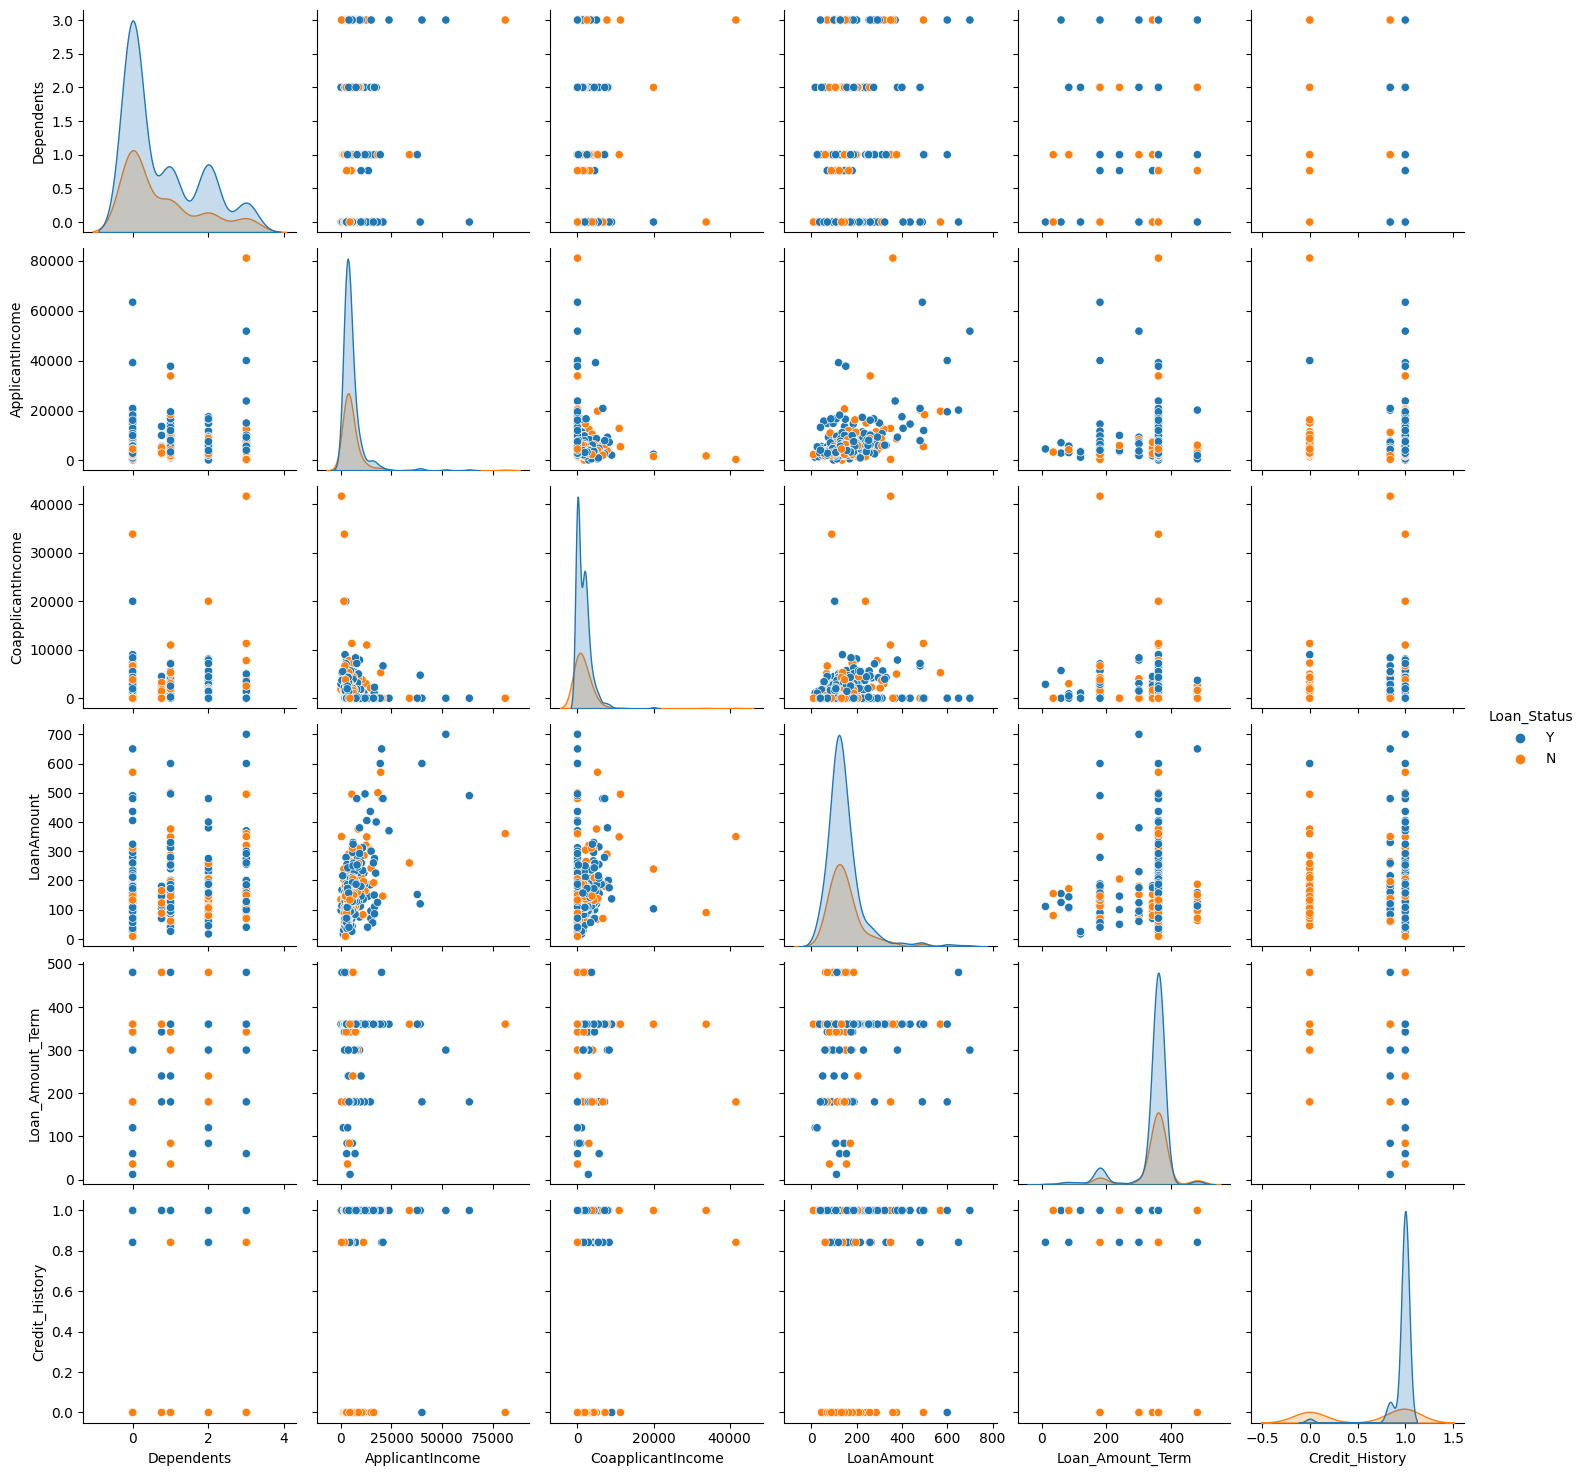

In [22]:
sb.pairplot(data,hue='Loan_Status')
pp.show()

# Encoding Categorical Features

In [23]:
data.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Encoding for non continuous features

In [24]:
data.drop('Loan_ID',axis=1,inplace=True)

## Encoding other features

### Looking at our categorical Features in detail

In [25]:
cf = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in cf:
    print('----------',i,'----------')
    print(data[i].value_counts())
    print('\n')

---------- Gender ----------
Male      500
Female    114
Name: Gender, dtype: int64


---------- Married ----------
Yes    400
No     214
Name: Married, dtype: int64


---------- Education ----------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


---------- Self_Employed ----------
No     528
Yes     86
Name: Self_Employed, dtype: int64


---------- Property_Area ----------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


---------- Loan_Status ----------
Y    422
N    192
Name: Loan_Status, dtype: int64




### Defining custom mapping

In [26]:
maps = [{'col':'Gender',
'mapping':{'Male':1,'Female':0}},
        {'col':'Married',
'mapping':{'Yes':1,'No':0}},
        {'col':'Education',
'mapping':{'Graduate':1,'Not Graduate':0}},
        {'col':'Self_Employed',
'mapping':{'Yes':1,'No':0}},
        {'col':'Property_Area',
'mapping':{'Rural':0,'Semiurban':1,'Urban':2}},
        {'col':'Loan_Status',
'mapping':{'Y':1,'N':0}}]

### Encoding our data

In [27]:
oc = OrdinalEncoder(cols=cf,return_df=True,
                           mapping=maps)
data[cf] = oc.fit_transform(data[cf])

### Verifying our data

In [28]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          1              0             5849   
1       1        1         1.0          1              0             4583   
2       1        1         0.0          1              1             3000   
3       1        1         0.0          0              0             2583   
4       1        0         0.0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 43.3 KB


# Splitting our data set

In [30]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [31]:
x_train.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
244       1        1         0.0          0              0             3406   
393       1        1         2.0          0              0             1993   
310       0        0         0.0          1              0             2917   
408       1        1         1.0          1              0             8300   
572       1        1         2.0          1              0            16666   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
244             4417.0       123.0             360.0             1.0   
393             1625.0       113.0             180.0             1.0   
310                0.0        84.0             360.0             1.0   
408                0.0       152.0             300.0             0.0   
572                0.0       275.0             360.0             1.0   

     Property_Area  
244              1  
393              1  
310              1  
408              1  
572              2

In [32]:
x_test.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
350       1        1         0.0          1              0             9083   
377       1        1         0.0          1              0             4310   
163       1        1         2.0          1              0             4167   
609       0        0         0.0          1              0             2900   
132       1        0         0.0          1              0             2718   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
350                0.0       228.0             360.0        1.000000   
377                0.0       130.0             360.0        0.842199   
163             1447.0       158.0             360.0        1.000000   
609                0.0        71.0             360.0        1.000000   
132                0.0        70.0             360.0        1.000000   

     Property_Area  
350              1  
377              1  
163              0  
609              0  
132              1

In [33]:
y_train.head()

244    1
393    1
310    1
408    0
572    1
Name: Loan_Status, dtype: int32

In [34]:
y_test.head()

350    1
377    1
163    1
609    1
132    1
Name: Loan_Status, dtype: int32

# Training our models

## Model 1 : Naive Bayes (Gaussian Naive Bayes)

In [35]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

## Model 2 : Decision Tree Classifier

In [36]:
dtc = DTC(criterion="entropy", max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Visualisng the decision Tree

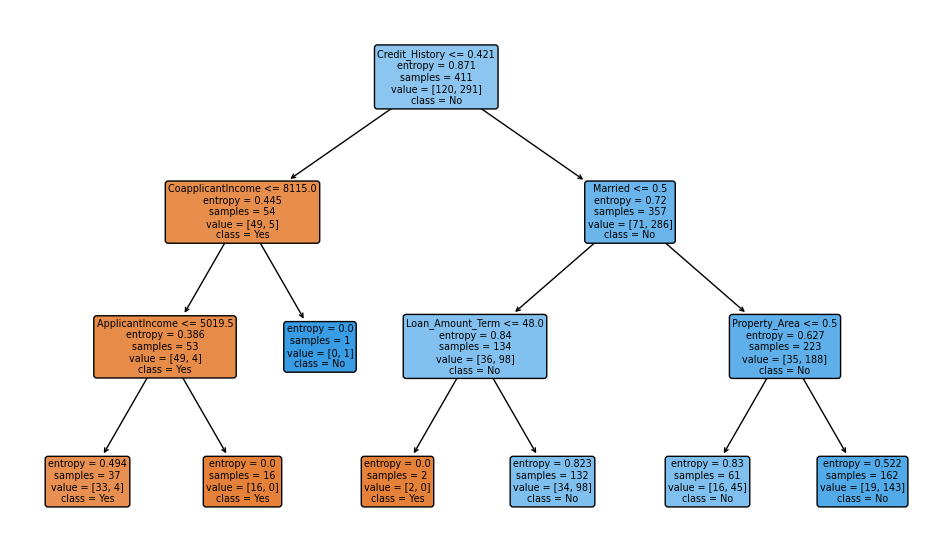

In [37]:
pp.figure(figsize=(12,7))
tree.plot_tree(dtc.fit(x_train,y_train),feature_names = x_train.columns,class_names=['Yes','No'],
               filled=True,rounded=True)
pp.show()

## Model 3 : Random Forest Classifier

In [38]:
rfc = RandomForestClassifier(criterion='entropy',max_depth=3,random_state=42,n_jobs=-1)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_jobs=-1,
                       random_state=42)

# Evaluationg our models

## Accuracy Scores

In [39]:
models = ["Naive Bayes","Decision Tree","Random Forest"]
acc = pd.DataFrame({
    "train" : [accuracy_score(y_train,nb.predict(x_train))*100,accuracy_score(y_train,dtc.predict(x_train))*100,
              accuracy_score(y_train,rfc.predict(x_train))*100],
    "test" : [accuracy_score(y_test,nb.predict(x_test))*100,accuracy_score(y_test,dtc.predict(x_test))*100,
              accuracy_score(y_test,rfc.predict(x_test))*100]
},index=models)

In [40]:
acc

train       test
Naive Bayes    81.265207  79.802956
Decision Tree  82.238443  79.310345
Random Forest  81.508516  79.802956

## Classification Reports

### Naive Bayes

In [41]:
print(classification_report(y_train,nb.predict(x_train),target_names=["Yes","No"]))

              precision    recall  f1-score   support

         Yes       0.81      0.47      0.59       120
          No       0.81      0.96      0.88       291

    accuracy                           0.81       411
   macro avg       0.81      0.71      0.74       411
weighted avg       0.81      0.81      0.79       411



## Decision Tree

In [42]:
print(classification_report(y_train,dtc.predict(x_train),target_names=["Yes","No"]))

              precision    recall  f1-score   support

         Yes       0.93      0.42      0.58       120
          No       0.81      0.99      0.89       291

    accuracy                           0.82       411
   macro avg       0.87      0.71      0.74       411
weighted avg       0.84      0.82      0.80       411



## Random Forest

In [43]:
print(classification_report(y_train,rfc.predict(x_train),target_names=["Yes","No"]))

              precision    recall  f1-score   support

         Yes       0.91      0.41      0.56       120
          No       0.80      0.98      0.88       291

    accuracy                           0.82       411
   macro avg       0.85      0.70      0.72       411
weighted avg       0.83      0.82      0.79       411



## AUC ROC CURVE

## Getting ROC Scores

In [44]:
pred_prob1 = nb.predict_proba(x_test)
pred_prob2 = dtc.predict_proba(x_test)
pred_prob3 = rfc.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

## Getting AUC Scores

In [45]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc = pd.DataFrame(data=[auc_score1, auc_score2, auc_score3],index=models,columns=['AUC Score'])
auc

AUC Score
Naive Bayes     0.736959
Decision Tree   0.735157
Random Forest   0.757740

## Plotting the ROC Curve

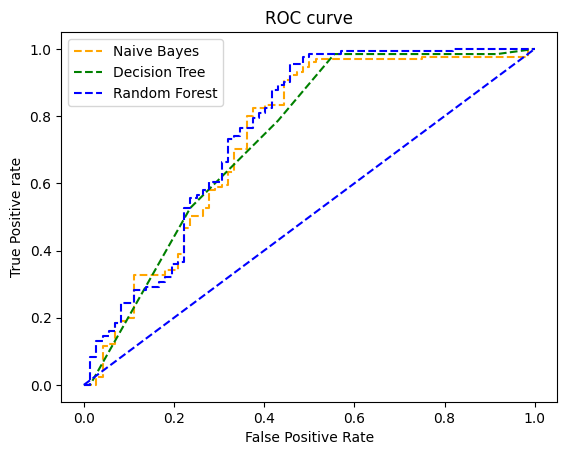

In [46]:
pp.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
pp.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
pp.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')
pp.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pp.title('ROC curve')
pp.xlabel('False Positive Rate')
pp.ylabel('True Positive rate')
pp.legend(loc='best')
pp.savefig('ROC',dpi=300)
pp.show()